# Explore Trifeature Dataset

In [1]:
import numpy as np
import pandas as pd
import sys

sys.path.append("..")
from helpers import filename_for

Welcome to JupyROOT 6.16/00


In [2]:
files = [
    filename_for(15, 30, 600, 500, n, "inclxx", s, "trifeature.pkl") for n in [1, 2, 3, 4, 5, 6] for s in range(20)
]
dfs = [pd.read_pickle(file) for file in files]
data = pd.concat(dfs, ignore_index=True)
display(data)

,nPN,nPP,nPH,nHits,nClus,Edep
0,1,1,1,12,8,245
1,1,1,1,6,6,167
2,1,0,0,0,0,0
3,1,1,1,13,1,322
4,1,1,1,15,5,206
...,...,...,...,...,...,...
1199995,6,5,5,75,23,1286
1199996,6,6,6,64,41,995
1199997,6,6,6,62,24,1315
1199998,6,6,6,81,38,1376


In [3]:
r = range(1, 6)
hits = [np.histogram(data[data["nPH"] == n]["nHits"], range=(0, 150), bins=150, density=True)[0] for n in r]
clus = [np.histogram(data[data["nPH"] == n]["nClus"], range=(0, 150), bins=150, density=True)[0] for n in r]
edep = [np.histogram(data[data["nPH"] == n]["Edep"], range=(0, 2000), bins=200, density=True)[0] for n in r]

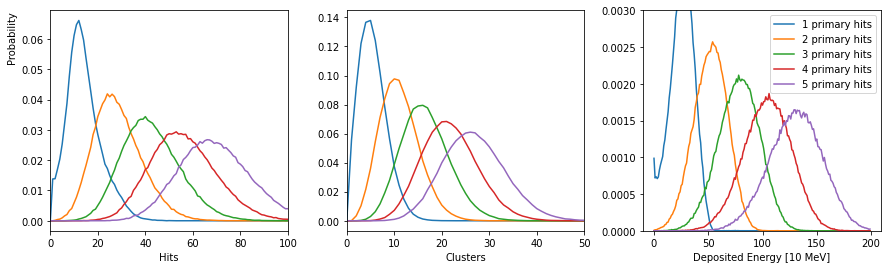

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(2 * 6.224, 2 * (6.224 / 1.618 * 0.5)))

ax1 = fig.add_subplot(131)
ax1.set_xlim(0, 100)
for h in hits:
    ax1.plot(h)
ax1.set_ylabel(r"Probability", horizontalalignment="right", y=1)
ax1.set_xlabel(r"Hits")

ax2 = fig.add_subplot(132)
ax2.set_xlim(0, 50)
for c in clus:
    ax2.plot(c)
ax2.set_xlabel(r"Clusters")

ax3 = fig.add_subplot(133)
ax3.set_ylim(0, 0.003)
for i, e in enumerate(edep, 1):
    ax3.plot(e, label=f"{i} primary hits")
ax3.set_xlabel(r"Deposited Energy [10 MeV]")

ax3.legend()

fig.tight_layout()

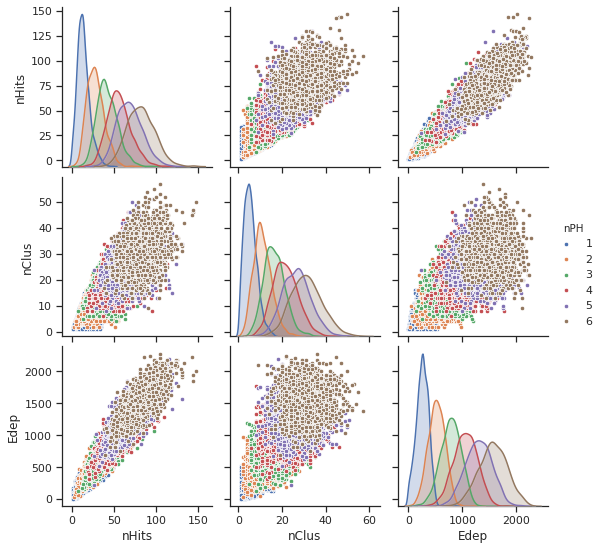

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sample = data[data["nPH"] > 0].sample(frac=0.01)
sns.set(style="ticks", color_codes=True)
sns.pairplot(sample, vars=["nHits", "nClus", "Edep"], hue="nPH", plot_kws={"s": 20})